# Project: Developing a Binomial NPV Equity Trade Rule
At time $t$, the binomial lattice model predicts the share price $S_{t}$ is governed by:

$$
\begin{equation*}
S_{t} = S_{\circ}\cdot{u}^{t-k}\cdot{d}^{k}\qquad\text{for}\quad{k=0,1,\dots,t}
\end{equation*}
$$

where $S_{\circ}$ is the initial share price at time $t_{\circ}$, $u$ is the $\texttt{up}$ factor, 
and $d$ is the $\texttt{down}$ factor. The probability that share price takes on a particular value at time $t$ is given by:

$$
\begin{equation*}
P(S_{t} = S_{\circ}\cdot{u}^{t-k}\cdot{d}^{k}) = \binom{t}{k}\cdot{(1-p)}^{k}\cdot{p}^{t-k}\qquad\text{for}\quad{k=0,1,\dots,t}
\end{equation*}
$$

where $p$ is the probability of an $\texttt{up}$ move, and $1-p$ is the probability of a $\texttt{down}$ move. 
Putting this together with our _short-term trade rule_ (where we have assumed a negligible discount $\mathcal{D}_{t,0}(\bar{r})\simeq{1}$) gives a value for the distribution of scaled Net Present Values (NPVs), i.e., a restatement of the fractional return at time `t`:

$$
\begin{equation*}
\frac{\text{NPV}_{t}}{n_{\circ}S_{\circ}}\in\left\{u^{t-k}\cdot{d}^{k} - 1\right\}_{k=0}^{k=t}
\end{equation*}
$$

## Learning objectives
The aim of this example is to help students understand how to use a binomial lattice description of future share prices to compute the probability of a successful trade. Toward this goal, we will:


the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) of fractional returns using a binomial lattice model. By doing so, we can understand the probability of achieving a specific fractional return within a set time frame based on a future predicted using a binomial lattice. 

* __Objective 1__: Compute the price and probability values for the leaves of a binomial tree using the analytical expression
    * `Check`: Compare the analytical calculations versus those from the [VLQuantitativeFinancePackage.jl package](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git)
* __Objective 2__: Compute the Probability of Profit of an equity trade via sampling
    * `TODO`: Estimate the cumulative distribution of the equity fractional return
    * `TODO`: Visualize the cumulative distribution function

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions we will use in the exercise, and custom types to model the components of our example problem.

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-1/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-1/Manifest.toml`
  Activating project at `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-1`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-1/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-1/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-1/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CH

## Objective 1: Compute the price and probability values for the leaves of a binomial tree using the analytical expression
First, let's start by verifying the calculations done in the [VLQuantitativeFinancePackage.jl package](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git) against the analytical share price and probability expressions for a binomial lattice model. 

* To start, let's set values for the time parameter (number of days in the future we are interested in) in the `t` variable and the average (real-world) values for the $(p,u,d)$ parameters:

In [2]:
t = 21;     # number of days in the future we want to simulate
u = 1.05;   # average up-factor
d = 0.97;   # average down factor
p = 0.53;   # probability of an up-move
Sₒ = 20.0;  # initial share price 

Next, let's directly compute the possible prices and the probability of those prices at time `t` using the analytical expressions developed for the binomial lattice model, using a `for` loop. In each iteration of the loop:
* First, we initialize the values of `k = 0,...t` in the `karray`, and then initialize storage in the nodes array, which will hold values for `k` in column `1`, the `price` in column `2`, the scaled NPV (approximately equal to the fractional return) in column `3`, and the `probability` of the `price` value for this node in column `4`
* Next, for each `k`, we compute the price, return, and probability and store these values in the `nodes` array.

In [3]:
karray = range(0,t,step = 1) |> collect;
analytical_nodes = Array{Float64,2}(undef, length(karray), 4);
for i ∈ eachindex(karray)
    k = karray[i];

    analytical_nodes[i,1] = k
    analytical_nodes[i,2] = Sₒ*(u^(t-k))*(d^(k));
    analytical_nodes[i,3] = (u^(t-k))*(d^(k)) - 1;
    analytical_nodes[i,4] = binomial(t,k)*(p^(t-k))*(1-p)^(k);
end
analytical_nodes

22×4 Matrix{Float64}:
  0.0  55.7193   1.78596     1.62104e-6
  1.0  51.474    1.5737      3.0188e-5
  2.0  47.5521   1.37761     0.000267705
  3.0  43.9291   1.19646     0.00150353
  4.0  40.5821   1.02911     0.00599992
  5.0  37.4902   0.874509    0.0180903
  6.0  34.6338   0.731689    0.0427796
  7.0  31.995    0.599751    0.0812928
  8.0  29.5573   0.477865    0.126157
  9.0  27.3053   0.365266    0.161598
 10.0  25.2249   0.261246    0.171964
 11.0  23.303    0.165151    0.152497
 12.0  21.5275   0.0763772   0.112694
 13.0  19.8874  -0.00563246  0.0691866
 14.0  18.3721  -0.0813938   0.0350595
 15.0  16.9723  -0.151383    0.0145089
 16.0  15.6792  -0.216039    0.0048249
 17.0  14.4846  -0.27577     0.00125844
 18.0  13.381   -0.330949    0.000247994
 19.0  12.3615  -0.381924    3.4724e-5
 20.0  11.4197  -0.429016    3.0793e-6
 21.0  10.5496  -0.472519    1.30033e-7

### Check: Compare the analytical price and probability calculations with those from the [VLQuantitativeFinancePackage.jl package](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git)

In [4]:
test_lattice_model = build(MyBinomialEquityPriceTree, (
        u = u, d = d, p = p)) |> (x-> populate(x, Sₒ = Sₒ, h = t));

Get the collection of nodes of type `MyBiomialLatticeEquityNodeModel,` using the short-cut syntax `(tree::MyBinomialEquityPriceTree)(level::Int64)`, which returns the collection of nodes at `level = t.` Store the tree nodes at `level=t` in the `test_node_array` array
* The short-cut syntax for accessing the tree nodes is equivalent to the command: `tree.levels[level] .|> x-> tree.data[x]`

In [5]:
test_node_array = test_lattice_model(t);

Now, we can compare the analytical nodes with the nodes computed by the [VLQuantitativeFinancePackage.jl package](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git) package. First, the number of nodes should be the same. Let's test this with the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert). In particular, we'll test the condition `length(test_node_array) == length(karray).` If this condition `fails`, an [AssertionError](https://docs.julialang.org/en/v1/base/base/#Core.AssertionError) is thrown

In [6]:
@assert(length(test_node_array) == length(karray))

Next, let's check the values of the price and probability at each tree node using a combination of the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) and the [isapprox function](https://docs.julialang.org/en/v1/base/math/#Base.isapprox) using a `for` loop:

In [7]:
for i ∈ eachindex(karray)
    test_node_price = test_node_array[i].price;
    test_node_probability = test_node_array[i].probability;
    @assert (isapprox(analytical_nodes[i,2],test_node_price,rtol=1e-4) && isapprox(analytical_nodes[i,4],test_node_probability,rtol=1e-4))
end

## Objective 2: Compute the Probability of Profit (POP) of an equity trade  
Now that we have validated the model, and computed the share price and the probability of the share price using the binomial lattice analytical expressions, we can sample the nodes of the binomial tree at `level=t` using a [categorical distribution](https://en.wikipedia.org/wiki/Categorical_distribution) initialized with the probability of each node at `level = t`. From this data, we can approximate the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) for the fractional return, i.e., the probability that the fractional return will be less than some specified value.
* A [categorical distribution](https://en.wikipedia.org/wiki/Categorical_distribution) is a type of probability distribution that describes the possible outcomes of a random variable that can belong to one of `K` categories, with each category having its probability. In this case, the `K`-categories correspond to indexes of the nodes in the tree at `level=t`
* Let's create a [categorical distribution](https://en.wikipedia.org/wiki/Categorical_distribution) using the probabilities of our equity share prices on the leaves of the tree using the [Distributions.jl](https://github.com/JuliaStats/Distributions.jl) package. Save the [categorical distribution](https://en.wikipedia.org/wiki/Categorical_distribution) in the `d` variable:

In [8]:
d = Categorical(analytical_nodes[:,4]);

Next, let's create the `minimum_return_target_array`, which holds the fractional returns calculated from the leaves of the binomial tree (the third column of the `analytical_nodes` array):

In [9]:
minimum_return_target_array = analytical_nodes[:,3];

### TODO: Estimate the cumulative distribution of the equity fractional return
Finally, we let's draw `number_of_samples` from the categorical distribution `d` for each value in the `minimum_return_target_array` array to estimate the probability $P(X\leq{x})$ using a `for` loop. For iteration of the loop, we:

* Specify a value for the `minimum_target_return`, i.e., this is the minimum level of return that we would accept.
* Next, initialize a counter variable `N₊ = 0` and generate `number_of_samples` values for the `random_state_index`, which points to a random category in our set of possible categories (leaves of the binomial tree).
* We get the fractional return for the random category, i.e., tree node and store it in the `random_return_value` variable. We increment the counter variable if the `random_return_value<=minimum_target_return`.
* Finally, we estimate the `probability` of having `random_return_value<=minimum_target_return` by computing `N₊/number_of_samples`. We store this in the `length(karray)`$\times$`2` array `cumulative_distribution_array`, where the first column is the `minimum_target_return`, and the second column is the `probability.` 

In [12]:
number_of_samples = 25000; # number of samples that we draw from the distribution -
cumulative_distribution_array = Array{Float64,2}(undef, length(karray), 2);
for i ∈ eachindex(karray)
    
    minimum_target_return = minimum_return_target_array[i];
    
    N₊ = 0;
    for j ∈ 1:number_of_samples
        random_state_index = rand(d);
        random_return_value = analytical_nodes[random_state_index, 3];
        if random_return_value <= minimum_target_return;
            N₊ += 1
        end
    end
    
    probability = N₊/number_of_samples;     
    cumulative_distribution_array[i,1] = minimum_target_return;
    cumulative_distribution_array[i,2] = probability;
end

### TODO: Visualize the cumulative distribution function
The cumulative distribution function $F_{X}(x) = P(X\leq{x})$ is defined as the probability that a random variable $X$ is less than or equal to a value $x$. In the sampling procedure above, we estimated $F_{X}(x) = P(X\leq{x})$ for different values of $x$, i.e., for different values of the `minimum_target_return`. 
* This tells us the probability that our fractional return is less than a specified (desired) value. On the other hand, $1 - F_{X}(x)$ tells us $P(X>x)$, i.e., the probability that the observed return (random variable) `X` is greater than the minimum desired return `x`.

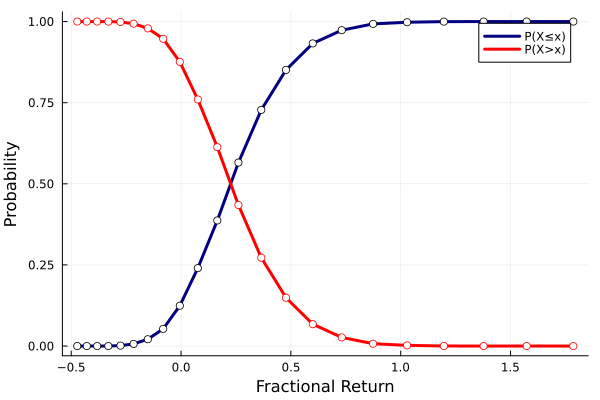

In [17]:
plot(reverse(cumulative_distribution_array[:,1]), reverse(cumulative_distribution_array[:,2]), 
    lw=3, c=:navyblue, label="P(X≤x)", xlabel="Fractional Return", ylabel = "Probability")
plot!(reverse(cumulative_distribution_array[:,1]), 1 .- reverse(cumulative_distribution_array[:,2]), 
    lw=3, c=:red, label="P(X>x)", xlabel="Fractional Return", ylabel = "Probability")
scatter!(reverse(cumulative_distribution_array[:,1]), reverse(cumulative_distribution_array[:,2]),
    lw=3, c=:white, mscc=:navyblue, label="")
scatter!(reverse(cumulative_distribution_array[:,1]), 1 .- reverse(cumulative_distribution_array[:,2]),
    lw=3, c=:white, msc=:red, label="")

## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.